<a href="https://colab.research.google.com/github/KARENCMP82/Python/blob/main/House_EjercMio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
 pip install catboost

In [4]:
 pip install shap

In [5]:
# gestión de datos
import numpy as np # Importa la librería numpy para operaciones numéricas
import pandas as pd # Importa la librería pandas para manipulación de datos (DataFrames)

# # fechas
# import datetime as dt
# from datetime import datetime
# from dateutil.relativedelta import relativedelta
# Estos módulos están comentados, pero si los necesitas para trabajar con fechas,
# descoméntalos y añade una breve descripción de su función

# gráficos
import seaborn as sns # Importa la librería seaborn para visualización de datos
import matplotlib.pyplot as plt # Importa la librería matplotlib para crear gráficos

# preprocessing
from sklearn.preprocessing import StandardScaler # Importa StandardScaler para estandarización de datos
from sklearn.model_selection import train_test_split # Importa train_test_split para dividir datos en entrenamiento y prueba
from sklearn.ensemble import RandomForestRegressor # Importa RandomForestRegressor para modelos de regresión con Random Forest

# modelos
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor, Lasso, ElasticNet # Importa varios modelos lineales
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor # Importa modelos de ensamble
from xgboost import XGBRegressor # Importa el modelo XGBoost
from catboost import CatBoostRegressor # Importa el modelo CatBoost

# metricas
import sklearn.metrics as metrics # Importa el módulo metrics para evaluar el modelo

# hiperparametrizado
from sklearn.model_selection import GridSearchCV # Importa GridSearchCV para búsqueda de hiperparámetros

# interpretabilidad
import shap # Importa la librería SHAP para interpretar los modelos

# quitar alertas
import warnings
warnings.filterwarnings("ignore") # Ignora las advertencias para un código más limpio

# para visualizar mas columnas en un df
pd.set_option('display.max_columns',None) # Muestra todas las columnas del DataFrame en la salida

np.random.seed(42) # Fija la semilla aleatoria para la reproducibilidad de los resultados

In [6]:
#Conexion
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
#leemos el fichero IMDB
house=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ejercicios/House_Pricing.csv")
# Cargar archivo CSV como DataFrame ver los 5 primero registros
house.head(20)



Mounted at /content/drive


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,

In [7]:
house.tail()
#house.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [8]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
#número de valores únicos que hay en cada variable
house.nunique()

,0
Id,1460
MSSubClass,15
MSZoning,5
LotFrontage,110
LotArea,1073
...,...
MoSold,12
YrSold,5
SaleType,9
SaleCondition,6


In [10]:
#Suma los valores True (que representan valores faltantes) a lo largo de cada columna del DataFrame.
house.isna().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


boxplot

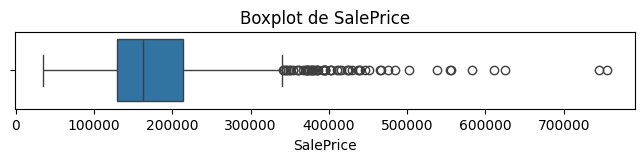

In [11]:
#Define la variable target
target = 'SalePrice'

# Crea la figura y los ejes del gráfico
fig, ax = plt.subplots(figsize=(8, 1))

# Genera el boxplot usando seaborn
sns.boxplot(data=house, x=target)

# Añade un título al gráfico
plt.title(f'Boxplot de {target}') #esto es opcional, pero ayuda a saber de q es el grafico

# Muestra el gráfico
plt.show()

In [12]:
#Creamos un nuevo csv para no modificar el 1º
houseCopy = house.copy()

In [13]:
#Borramos el id porq no es necesario
houseCopy.drop('Id', axis=1, inplace=True)

In [14]:
houseCopy.duplicated().sum()

0

**scatterplots**

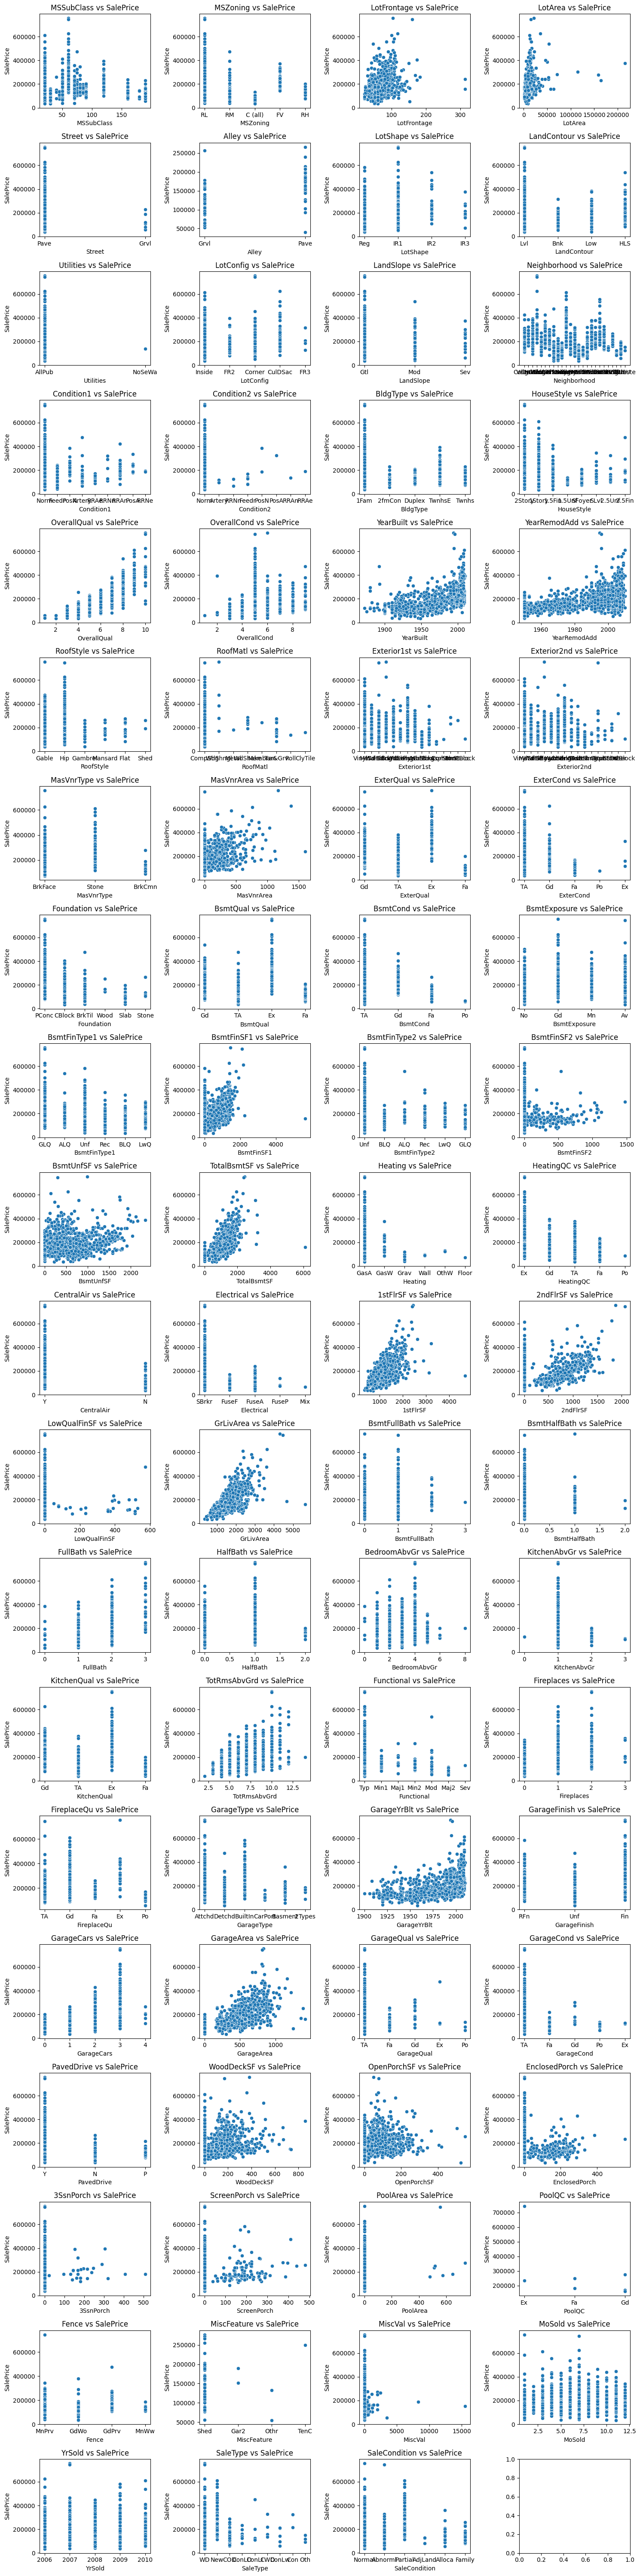

In [15]:
target = 'SalePrice'
# Variables para hacer 4 scatterplot por línea
graficos_por_fila = 4
variables = list(houseCopy.columns)
variables.remove(target)
num_variables = len(variables)

# Configura la cuadrícula de gráficos
fig, axes = plt.subplots(nrows=(num_variables + graficos_por_fila - 1) // graficos_por_fila, ncols=graficos_por_fila, figsize=(15, 60))
axes = axes.flatten()


# Crea un scatterplot para cada variable en relación a la variable objetivo
for i, var in enumerate(variables):
    sns.scatterplot(data=houseCopy, x=var, y=target, ax=axes[i])
    axes[i].set_title(f'{var} vs {target}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel(target)

plt.tight_layout()
plt.show()

# **Análisis de correlación**



*   Valores cercanos a 1: Indican una fuerte correlación positiva.
*   Valores cercanos a -1: Indican una fuerte correlación negativa
*   Valores cercanos a 0: Indican poca o ninguna correlación.








In [ ]:
# Identificar las columnas no numéricas
print(houseCopy.dtypes)

# Seleccionar solo las columnas numéricas
house_numerico = houseCopy.select_dtypes(include=[np.number])

# Calcular la matriz de correlación con las columnas numéricas
matriz_correlacion = house_numerico.corr()

# Mostrar la matriz de correlación
print(matriz_correlacion)

**Visualización de la matriz**

In [ ]:
# Seleccionar solo las columnas numéricas
house_numerico = houseCopy.select_dtypes(include=[np.number])

# Calcular la matriz de correlación con las columnas numéricas
matriz_correlacion = house_numerico.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(20, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

In [18]:
# Verificar si hay valores faltantes
valores_faltantes = houseCopy.isnull().sum()

# Mostrar los valores faltantes por columna
print("Valores faltantes por columna:")
print(valores_faltantes)

Valores faltantes por columna:
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64


In [ ]:
# Eliminar filas con valores faltantes en 'LotFrontage'
house_sin_faltantes = houseCopy.dropna(subset=['LotFrontage'])

Los **outliers** (valores atípicos) son datos que se desvían significativamente del resto de los datos en un conjunto. Pueden ser mucho más altos o mucho más bajos que la mayoría de los valores. Los outliers pueden surgir por errores de medición, errores de entrada de datos o pueden ser valores válidos pero raros.

In [ ]:
# Función para identificar outliers usando el método IQR (Rango Intercuartílico)
def identificar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[columna] < (Q1 - 1.5 * IQR)) | (df[columna] > (Q3 + 1.5 * IQR))]
    return outliers

# Función para eliminar outliers

def eliminar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    df_sin_outliers = df[~((df[columna] < (Q1 - 1.5 * IQR)) | (df[columna] > (Q3 + 1.5 * IQR)))]
    return df_sin_outliers

# Identificar y tratar outliers en todas las columnas numéricas del DataFrame
columnas_numericas = houseCopy.select_dtypes(include=[np.number]).columns

for columna in columnas_numericas:
    outliers = identificar_outliers(houseCopy, columna)
    print(f"Outliers en '{columna}':")
    print(outliers)

   # houseCopy = eliminar_outliers(houseCopy, columna)

# Mostrar el DataFrame sin outliers
print("DataFrame sin outliers:")
print(houseCopy)

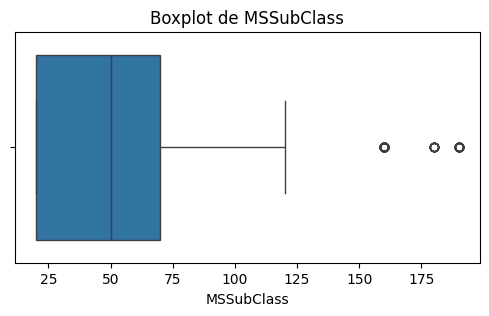

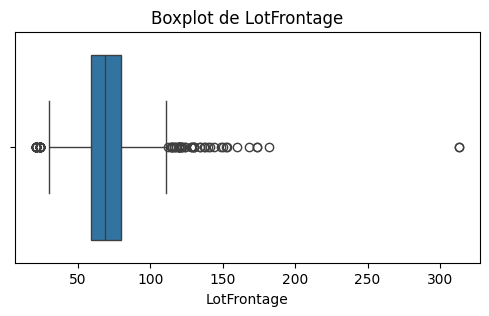

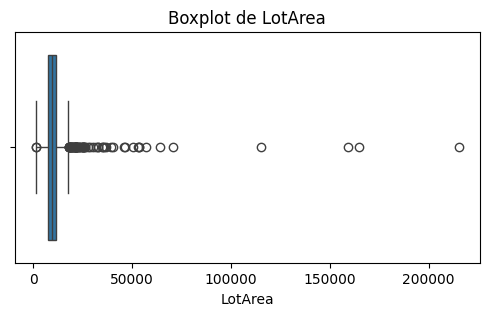

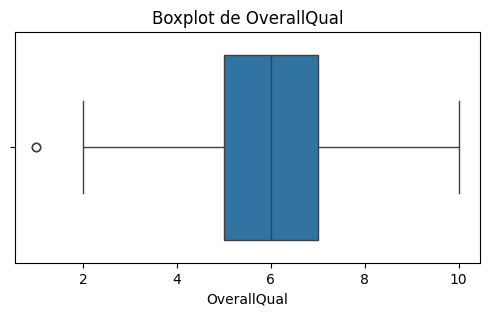

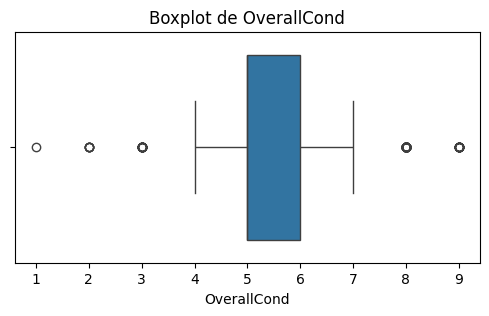

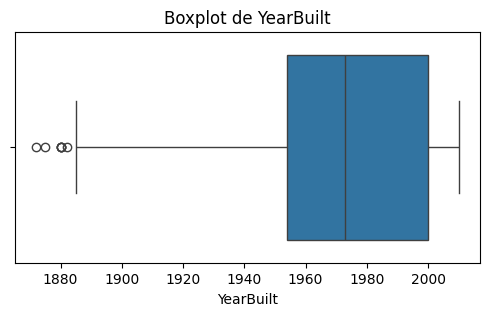

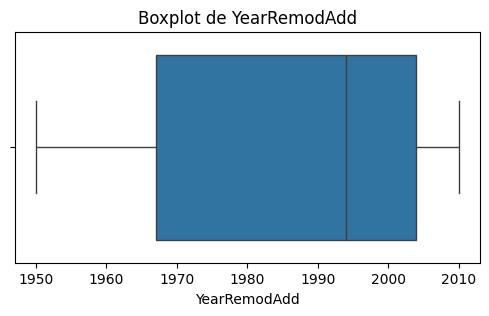

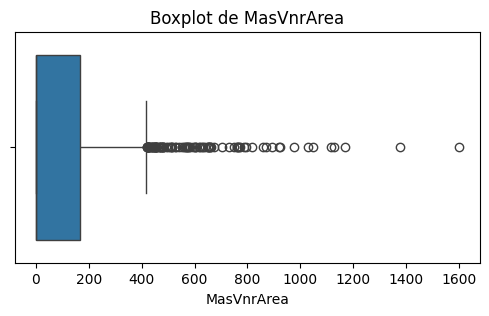

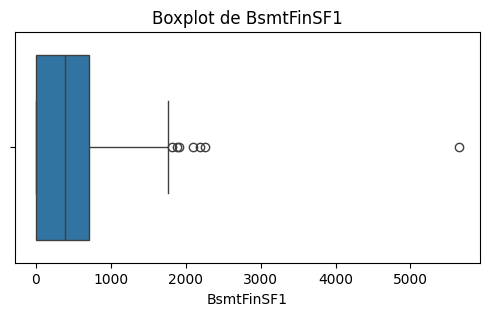

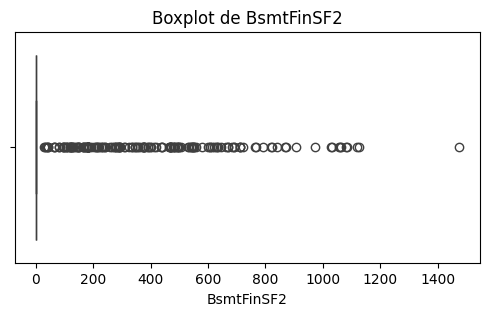

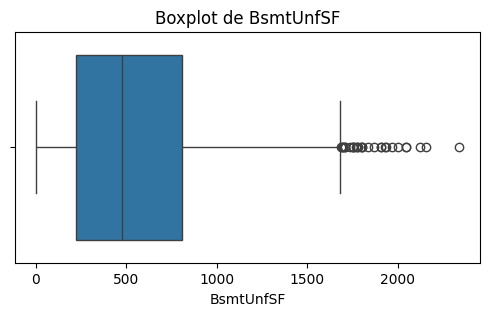

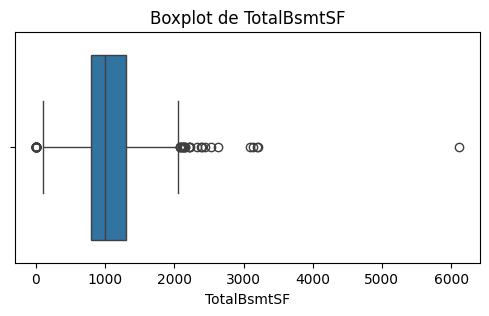

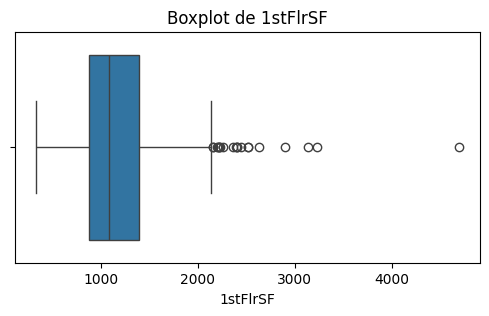

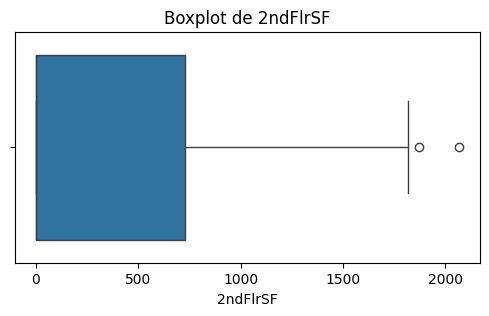

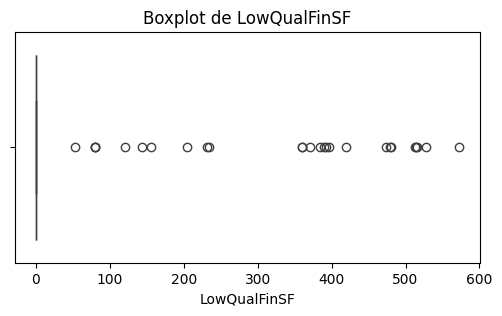

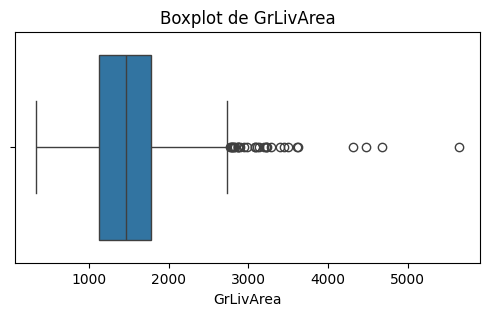

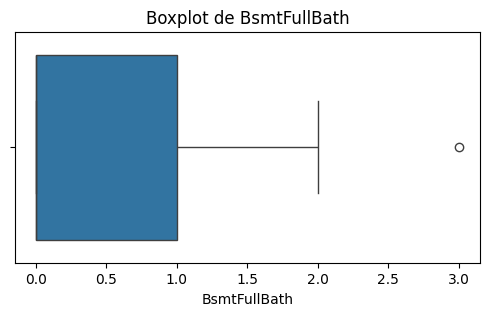

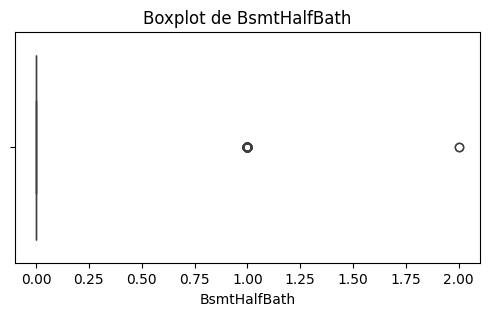

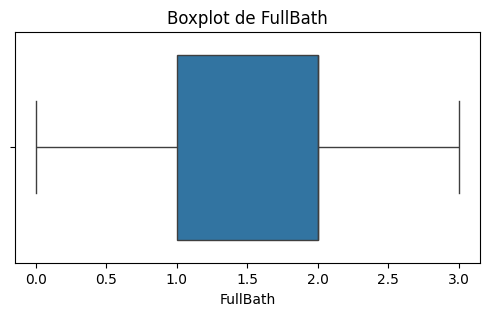

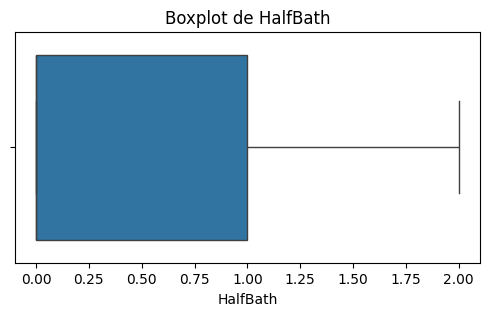

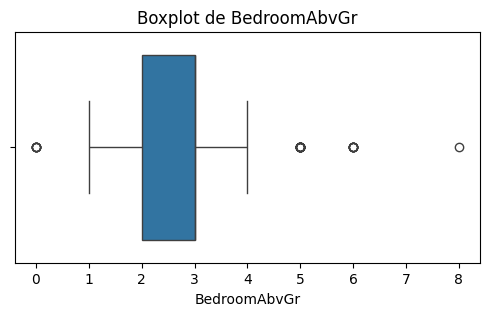

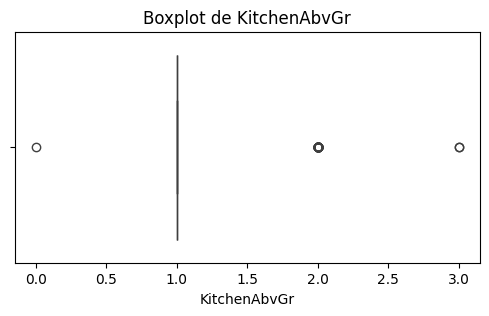

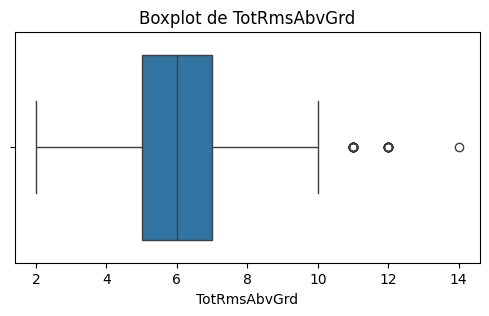

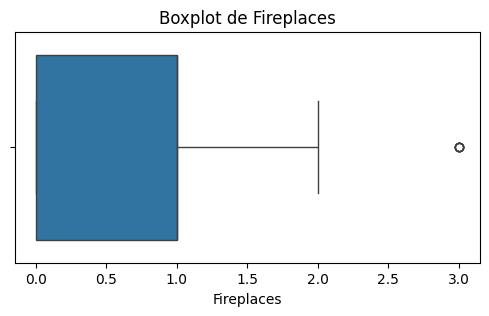

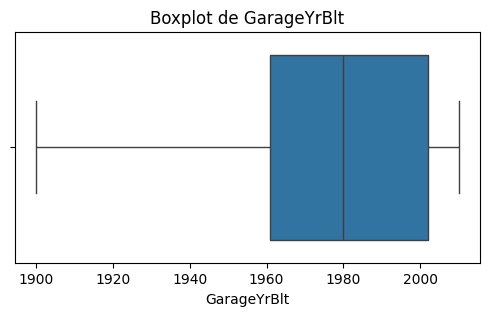

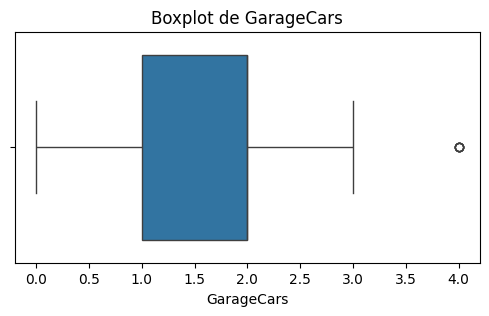

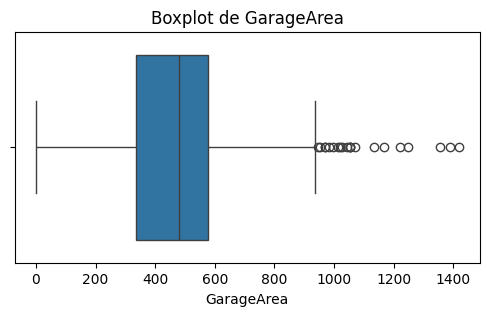

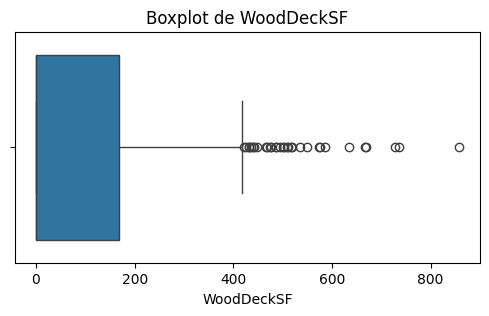

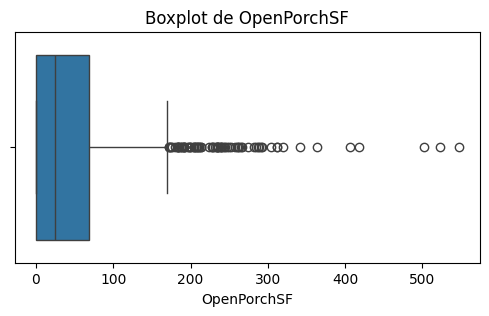

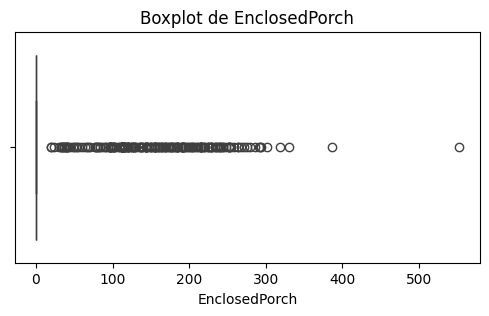

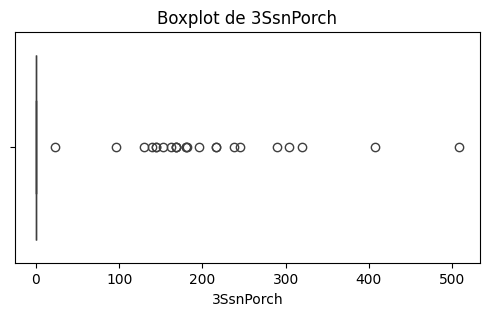

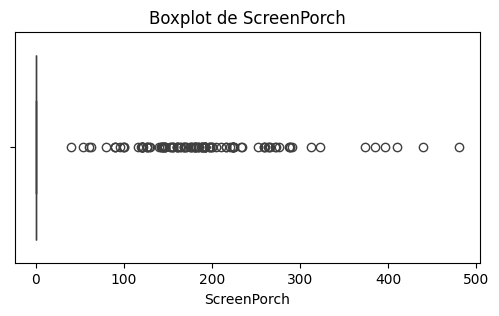

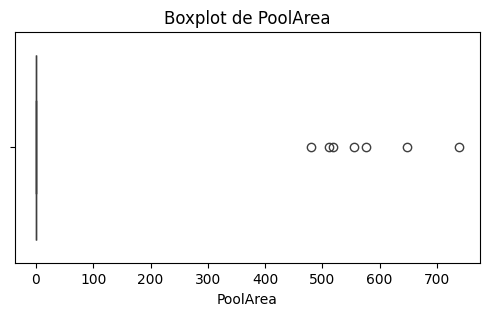

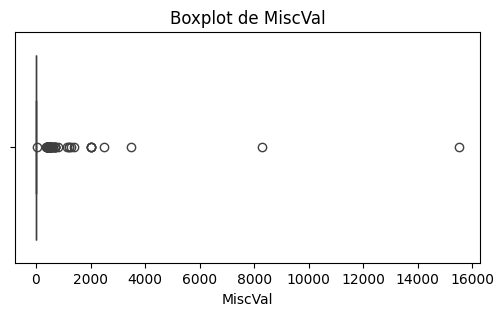

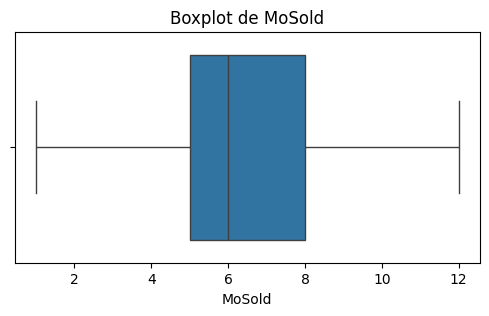

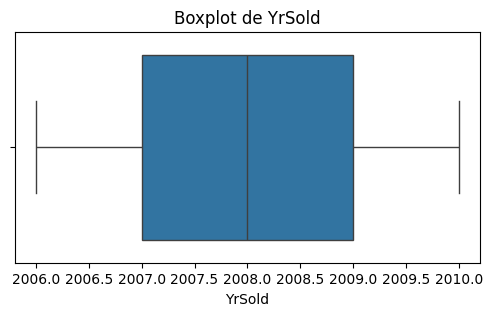

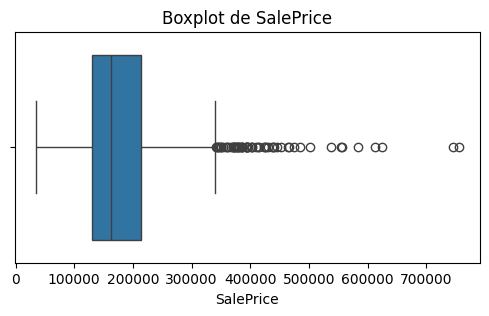

In [21]:
# Visualizar los outliers usando boxplots
for columna in columnas_numericas:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=houseCopy[columna])
    plt.title(f'Boxplot de {columna}')
    plt.xlabel(columna)
    plt.show()

In [ ]:
# Identificar columnas numéricas
columnas_numericas = houseCopy.select_dtypes(include=[np.number]).columns # Changed 'colum' to 'columns'
print(columnas_numericas)


In [ ]:
houseCopy.shape

In [ ]:
# Crear un gráfico de dispersión
plt.scatter(range(houseCopy.shape[0]), houseCopy['SalePrice'], s=5, color='blue')
# range(houseCopy.shape[0]) genera una secuencia de números desde 0 hasta el número de filas en houseCopy, usado como el eje X
# houseCopy['SalePrice'] son los valores de la columna SalePrice del DataFrame houseCopy, usados como el eje Y
# s=5 establece el tamaño de los puntos en el gráfico
# color='blue' establece el color de los puntos en azul

# Etiquetar el eje X
plt.xlabel('SalePrice')
# plt.xlabel() añade una etiqueta al eje X del gráfico
# 'SalePrice' es el texto de la etiqueta del eje X

# Etiquetar el eje Y
plt.ylabel('price')
# plt.ylabel() añade una etiqueta al eje Y del gráfico
# 'price' es el texto de la etiqueta del eje Y

# Mostrar el gráfico
plt.show()
# plt.show() muestra el gráfico en la pantalla

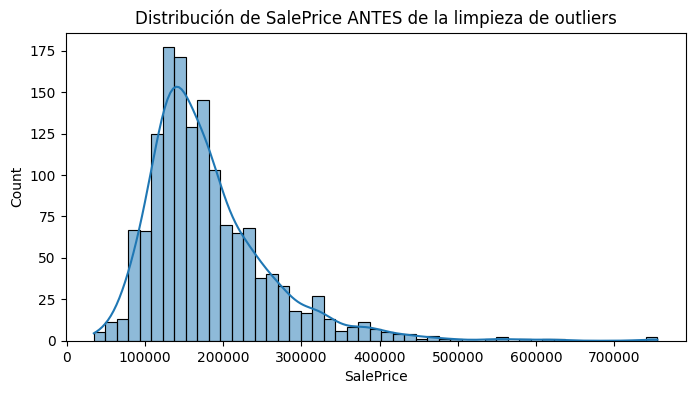

In [25]:
# 1. Crear el histograma ANTES
plt.figure(figsize=(8, 4))
sns.histplot(houseCopy['SalePrice'], kde=True)
plt.title('Distribución de SalePrice ANTES de la limpieza de outliers')
plt.show()

In [ ]:
# 4. Visualiza con boxplot ANTES
plt.figure(figsize=(8, 4))
sns.boxplot(x=houseCopy['SalePrice'])
plt.title('Boxplot de SalePrice ANTES de la limpieza de outliers')
plt.show()



In [27]:
# 2. Calcula el IQR
Q1 = houseCopy['SalePrice'].quantile(0.25)
# Calcula el primer cuartil (Q1), que es el valor por debajo del cual se encuentra el 25% de los datos

Q3 = houseCopy['SalePrice'].quantile(0.75)
# Calcula el tercer cuartil (Q3), que es el valor por debajo del cual se encuentra el 75% de los datos

IQR = Q3 - Q1
# Calcula el rango intercuartílico (IQR), que es la diferencia entre el tercer y el primer cuartil. El IQR mide la dispersión de los datos.

# 3. Calcula los límites para los outliers
limite_superior = Q3 + 1.5 * IQR
# Calcula el límite superior para identificar outliers. Los valores por encima de este límite se consideran outliers.

limite_inferior = Q1 - 1.5 * IQR
# Calcula el límite inferior para identificar outliers. Los valores por debajo de este límite se consideran outliers.

# 5. Elimina los outliers
houseCopy_sin_outliers = houseCopy[(houseCopy['SalePrice'] >= limite_inferior) & (houseCopy['SalePrice'] <= limite_superior)]
# Filtra el DataFrame houseCopy para eliminar las filas que contienen outliers en la columna 'SalePrice'.
# Solo se mantienen las filas donde 'SalePrice' está entre el límite inferior y el límite superior.

# Verificar si la última línea se ha ejecutado correctamente
if not houseCopy_sin_outliers.empty:
    print("Se ha ejecutado")
    # Si el DataFrame houseCopy_sin_outliers no está vacío, imprime "Se ha ejecutado".
else:
    print("Error")
    # Si el DataFrame houseCopy_sin_outliers está vacío, imprime "Error".

Se ha ejecutado


**Vemos los valores nulos**

Debemos borrar los valores nulos, en este caso vamos a rellenar con la mediana

In [28]:
houseCopy_sin_outliers['LotFrontage'] = houseCopy_sin_outliers['LotFrontage'].fillna(houseCopy_sin_outliers['LotFrontage'].median())
 # Llena los valores nulos en 'LotFrontage' con la mediana de la columna

In [29]:
valores_nulos = houseCopy_sin_outliers.isnull().sum()

# Mostrar los valores nulos por columna
print("Valores nulos por columna:")
print(valores_nulos)

Valores nulos por columna:
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64


# **Transformación de Variables Categóricas Ordinales:**
Identifica las variables categóricas

In [30]:
# Mostrar los datos únicos de cada columna
for column in houseCopy_sin_outliers.columns:
    unique_values = houseCopy_sin_outliers[column].unique()
    print(f"Columna '{column}' tiene los siguientes valores únicos: {unique_values}")
print("#############################################")
    # Detectar columnas con datos repetidos
print("\nColumnas con datos repetidos:")
for column in houseCopy_sin_outliers.columns:
    value_counts = houseCopy_sin_outliers[column].value_counts()
    repeated_values = value_counts[value_counts > 1]
    if not repeated_values.empty:
        print(f"Columna '{column}' tiene los siguientes valores repetidos:")
        print(repeated_values)


Columna 'MSSubClass' tiene los siguientes valores únicos: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
Columna 'MSZoning' tiene los siguientes valores únicos: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Columna 'LotFrontage' tiene los siguientes valores únicos: [ 65.  80.  68.  60.  84.  85.  75.  51.  50.  70.  91.  72.  66. 101.
  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52. 100.
  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40. 105.
  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120.  92. 134.  62.
  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43.  93.  30. 129.
 140.  35.  37. 118.  87. 116.  49.  96.  59.  36. 102.  58.  38. 109.
  56. 130.  53. 137.  45. 106.  42.  39. 144. 128. 149. 103. 313. 104.
 114. 168. 107. 182. 138. 152. 124. 153.  46.]
Columna 'LotArea' tiene los siguientes valores únicos: [ 8450  9600 11250 ... 17217 13175  9717]
Columna 'Street' tiene los siguientes valores únicos: ['Pave' 'Grvl']
Columna 'Alley' tiene 

# **Paso 1: Identificar las variables categóricas ordinales**

ExterQual

ExterCond

BsmtQual

BsmtCond

HeatingQC

KitchenQual

FireplaceQu

GarageQual

GarageCond

PoolQC

Fence

In [36]:
#Crear un diccionario de valores ya que todas comprates las iniciales
# Diccionarios de mapeo
qual_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
fence_mapping = {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'NA': 0}

# Lista de columnas a mapear con el diccionario de calidad
columns_to_map = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']

# Transformar las columnas usando .map()
for column in columns_to_map:
    houseCopy_sin_outliers[column] = houseCopy_sin_outliers[column].map(qual_mapping)

# Transformar la columna 'Fence' usando su diccionario específico
houseCopy_sin_outliers['Fence'] = houseCopy_sin_outliers['Fence'].map(fence_mapping)

# Mostrar el DataFrame transformado
print(houseCopy_sin_outliers)

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl   

# **Transformación de Variables Categóricas No Ordinales**



MSSubClass

MSZoning

Street

Alley

LotShape

LandContour

Utilities

LotConfig

LandSlope

Neighborhood

Condition1

Condition2

BldgType

HouseStyle

RoofStyle

RoofMatl

Exterior1st

Exterior2nd

MasVnrType

Foundation

BsmtExposure

BsmtFinType1

BsmtFinType2

Heating

CentralAir

Electrical

Functional

GarageType

GarageFinish

PavedDrive

MiscFeature

SaleType

SaleCondition

In [37]:
# Lista de columnas categóricas no ordinales
categorical_columns = [
    'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
    'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
    'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
    'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir',
    'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'MiscFeature',
    'SaleType', 'SaleCondition'
]

# Aplicar One-Hot Encoding
houseCopy_sin_outliers_one_hot = pd.get_dummies(houseCopy_sin_outliers, columns=categorical_columns)

# Mostrar el DataFrame transformado
print(houseCopy_sin_outliers_one_hot.head())

   LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0     8450            7            5       2003          2003   
1         80.0     9600            6            8       1976          1976   
2         68.0    11250            7            5       2001          2002   
3         60.0     9550            7            5       1915          1970   
4         84.0    14260            8            5       2000          2000   

   MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtFinSF1  \
0       196.0        NaN        NaN       NaN       NaN         706   
1         0.0        NaN        NaN       NaN       NaN         978   
2       162.0        NaN        NaN       NaN       NaN         486   
3         0.0        NaN        NaN       NaN       NaN         216   
4       350.0        NaN        NaN       NaN       NaN         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  \
0           0        150        

In [56]:
houseCopy_sin_outliers_one_hot.head()

AttributeError: 'str' object has no attribute 'head'

# **Análisis de Correlación y Eliminación de Variables:**

In [40]:
# Seleccionar las columnas no numéricas
non_numeric_columns = houseCopy_sin_outliers_one_hot.select_dtypes(include=['object']).columns


# Mostrar las columnas no numéricas
print("Columnas no numéricas:")
print(non_numeric_columns)

Columnas no numéricas:
Index([], dtype='object')


In [41]:
# Calcular la matriz de correlación
correlation_matrix = houseCopy_sin_outliers_one_hot.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

                       LotFrontage   LotArea  OverallQual  OverallCond  \
LotFrontage               1.000000  0.307507     0.183728    -0.038371   
LotArea                   0.307507  1.000000     0.070548     0.004398   
OverallQual               0.183728  0.070548     1.000000    -0.071040   
OverallCond              -0.038371  0.004398    -0.071040     1.000000   
YearRemodAdd              0.058771  0.012715     0.532226     0.093423   
...                            ...       ...          ...          ...   
SaleCondition_AdjLand    -0.035746 -0.013852    -0.041088    -0.040293   
SaleCondition_Alloca     -0.019374  0.013731    -0.055682    -0.039837   
SaleCondition_Family      0.022022 -0.007977    -0.017246    -0.025979   
SaleCondition_Normal     -0.045422  0.007900    -0.075004     0.145815   
SaleCondition_Partial     0.095623  0.016505     0.248461    -0.129157   

                       YearRemodAdd  MasVnrArea  ExterQual  ExterCond  \
LotFrontage                0.058771   

**Paso 2: Identificar pares de variables altamente correlacionadas**

In [53]:
# Crear una máscara para la matriz de correlación
# Esta máscara se utiliza para seleccionar solo los valores de la parte superior de la matriz
# (sin incluir la diagonal), evitando duplicados y auto-correlaciones.
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Aplicar la máscara y encontrar pares de variables altamente correlacionadas
# La función .where() aplica la máscara a la matriz de correlación, sustituyendo los valores
# que están por debajo de la diagonal con NaN.
# Esto asegura que solo analicemos la parte superior de la matriz.
high_corr_pairs = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# La función .stack() convierte la matriz en una serie y .reset_index() convierte esta
# serie en un DataFrame, manteniendo los nombres de las variables y creando una nueva columna con la correlación.
high_corr_pairs = high_corr_pairs.stack().reset_index()

# Asignar nombres a las columnas del DataFrame.
# Esto hace que el DataFrame sea más fácil de entender.
high_corr_pairs.columns = ['Variable1', 'Variable2', 'Correlation']

# Filtrar el DataFrame para mantener solo las filas donde la correlación es mayor que 0.9
# o menor que -0.9, indicando una alta correlación (positiva o negativa).
high_corr_pairs = high_corr_pairs[(high_corr_pairs['Correlation'] > 0.9) | (high_corr_pairs['Correlation'] < -0.9)]

# Imprimir el DataFrame resultante con los pares de variables altamente correlacionadas.
print(high_corr_pairs)

                 Variable1              Variable2  Correlation
7709         MSSubClass_45      HouseStyle_1.5Unf     0.925152
7921         MSSubClass_50      HouseStyle_1.5Fin     0.939876
8770         MSSubClass_80        HouseStyle_SLvl     0.941265
9175         MSSubClass_90        BldgType_Duplex     1.000000
9992        MSSubClass_190        BldgType_2fmCon     0.983379
11125          Street_Grvl            Street_Pave    -1.000000
11909         LotShape_IR1           LotShape_Reg    -0.932507
13423     Utilities_AllPub       Utilities_NoSeWa    -1.000000
14697        LandSlope_Gtl          LandSlope_Mod    -0.910012
23489      RoofStyle_Gable          RoofStyle_Hip    -0.925674
25389   Exterior1st_CBlock     Exterior2nd_CBlock     1.000000
25491  Exterior1st_CemntBd    Exterior2nd_CmentBd     0.989971
25791  Exterior1st_MetalSd    Exterior2nd_MetalSd     0.972550
26178  Exterior1st_VinylSd    Exterior2nd_VinylSd     0.976209
29638         CentralAir_N           CentralAir_Y    -1

**Paso 3: Eliminar la variable menos correlacionada con la variable objetivo**